## Final Project Submission

Please fill out:
* Student name: Mit Patel
* Student pace: Part Iime
* Scheduled project review date/time: 
* Instructor name: Jeff Herman
* Blog post URL:


# Loan Status Classification

- As a project 3 module to cover the classification i have selected the the data from kaggle of a bank/financial organization of all their loans.
- We will explore various features about th borrowers like credit score, annual income, years of employement and try to train our classifer to predict if the load would be paid or not.

## Loading the Dataset and Pre-processing 

### Importing Libraries

In [1]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Seaborn for visualization
import seaborn as sns

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

## Data Cleaning and formatting
In first step we will load the data and examine it and try to interpretate as mush as possible

In [2]:
# Load in credit data into a dataframe 
credit = pd.read_csv("credit_train.csv")

# Display top of dataframe
credit.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


### DataFrame Shape

In [3]:
#lets check the dimenstion of the data i.e. num of rows and columns
credit.shape

(100514, 19)

### Data Types for each column

In [4]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
Loan ID                         100000 non-null object
Customer ID                     100000 non-null object
Loan Status                     100000 non-null object
Current Loan Amount             100000 non-null float64
Term                            100000 non-null object
Credit Score                    80846 non-null float64
Annual Income                   80846 non-null float64
Years in current job            95778 non-null object
Home Ownership                  100000 non-null object
Purpose                         100000 non-null object
Monthly Debt                    100000 non-null float64
Years of Credit History         100000 non-null float64
Months since last delinquent    46859 non-null float64
Number of Open Accounts         100000 non-null float64
Number of Credit Problems       100000 non-null float64
Current Credit Balance          100000 non-null float64
Maxi

### Statistics for each column

In [5]:
credit.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


From datafram info we can say that columns `Loan ID` and `Customer ID` are two feature used for identifiation. This features are not help full in analysis process. So, we can drop them.

In [6]:
credit.drop(labels=['Loan ID','Customer ID'], axis=1, inplace=True)

### Dealing With Missing Vlues `NaN`

To Deal with missing values in each column we define a funtion that gives up the valulization of total missing values in each column and the percentage for it. This will help us to identify if we want to drop the column or to replace them.

In [7]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [8]:
# Now Lets call the fucntion ont the dataframe
missing_values_table(credit)

Your selected dataframe has 17 columns.
There are 17 columns that have missing values.


,Missing Values,% of Total Values
Months since last delinquent,53655,53.4
Credit Score,19668,19.6
Annual Income,19668,19.6
Years in current job,4736,4.7
Bankruptcies,718,0.7
Tax Liens,524,0.5
Maximum Open Credit,516,0.5
Current Credit Balance,514,0.5
Number of Credit Problems,514,0.5
Number of Open Accounts,514,0.5


- Now Let's Deal with them one by one
- we can see the column `Months since last delinquent` has missing values with ration of more the 50% so we can drop that column

In [9]:
credit.drop(columns = 'Months since last delinquent', axis=1, inplace=True)

One thing to notice in the table of missing values is 514 record have NaN in column in `Years of Credit History` and we know no loan is possibel without that perticular information. So, let's have look at the record that have NaN values in `Years of Credit History`.

In [10]:
credit[credit['Years of Credit History'].isnull() == True]

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As suspected last 514 record are Null entires and we can drop this rows.

In [11]:
credit.drop(credit.tail(514).index, inplace=True)

In [12]:
#Now lets run the missing values table function
missing_values_table(credit)

Your selected dataframe has 16 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
Credit Score,19154,19.2
Annual Income,19154,19.2
Years in current job,4222,4.2
Bankruptcies,204,0.2
Tax Liens,10,0.0
Maximum Open Credit,2,0.0


As the number of missing values is so low in the `Maximum Open Credit` i will drop them

In [13]:
for i in credit['Maximum Open Credit'][credit['Maximum Open Credit'].isnull() == True].index:
    credit.drop(labels=i, inplace=True)

In [14]:
#Now lets run the missing values table function
missing_values_table(credit)

Your selected dataframe has 16 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
Credit Score,19153,19.2
Annual Income,19153,19.2
Years in current job,4222,4.2
Bankruptcies,204,0.2
Tax Liens,10,0.0


As the number of missing values is so low in the `Tax Liens` i will drop them

In [15]:
for i in credit['Tax Liens'][credit['Tax Liens'].isnull() == True].index:
    credit.drop(labels=i, inplace=True)

In [16]:
#Now lets run the missing values table function
missing_values_table(credit)

Your selected dataframe has 16 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
Credit Score,19149,19.2
Annual Income,19149,19.2
Years in current job,4222,4.2
Bankruptcies,194,0.2


As the number of missing values is so low in the `Bankruptcies` i will drop them

In [17]:
for i in credit['Bankruptcies'][credit['Bankruptcies'].isnull() == True].index:
    credit.drop(labels=i, inplace=True)

In [18]:
#Now lets run the missing values table function
missing_values_table(credit)

Your selected dataframe has 16 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
Credit Score,19111,19.2
Annual Income,19111,19.2
Years in current job,4222,4.2


Now i will use the `mean` technique to fill the NaN values.

In [19]:
credit.fillna(credit.mean(), inplace=True)

In [21]:
#Now lets run the missing values table function
missing_values_table(credit)

Your selected dataframe has 16 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
Years in current job,4222,4.2


The feature `Years in current job` didn't fill because it has categorical values.

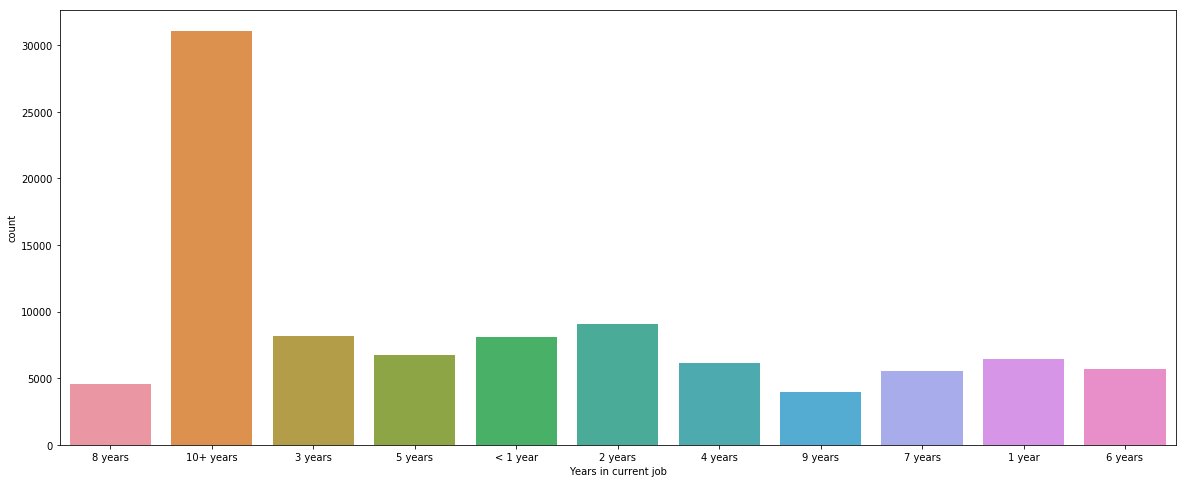

In [22]:
plt.figure(figsize=(20,8))
sns.countplot(credit['Years in current job'])
plt.show()

This columns have 10+ Years as most frequent values. So, we fill NaN with 10+ Years

In [23]:
credit.fillna('10+ years', inplace=True)

In [24]:
#Now lets run the missing values table function
missing_values_table(credit)

Your selected dataframe has 16 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


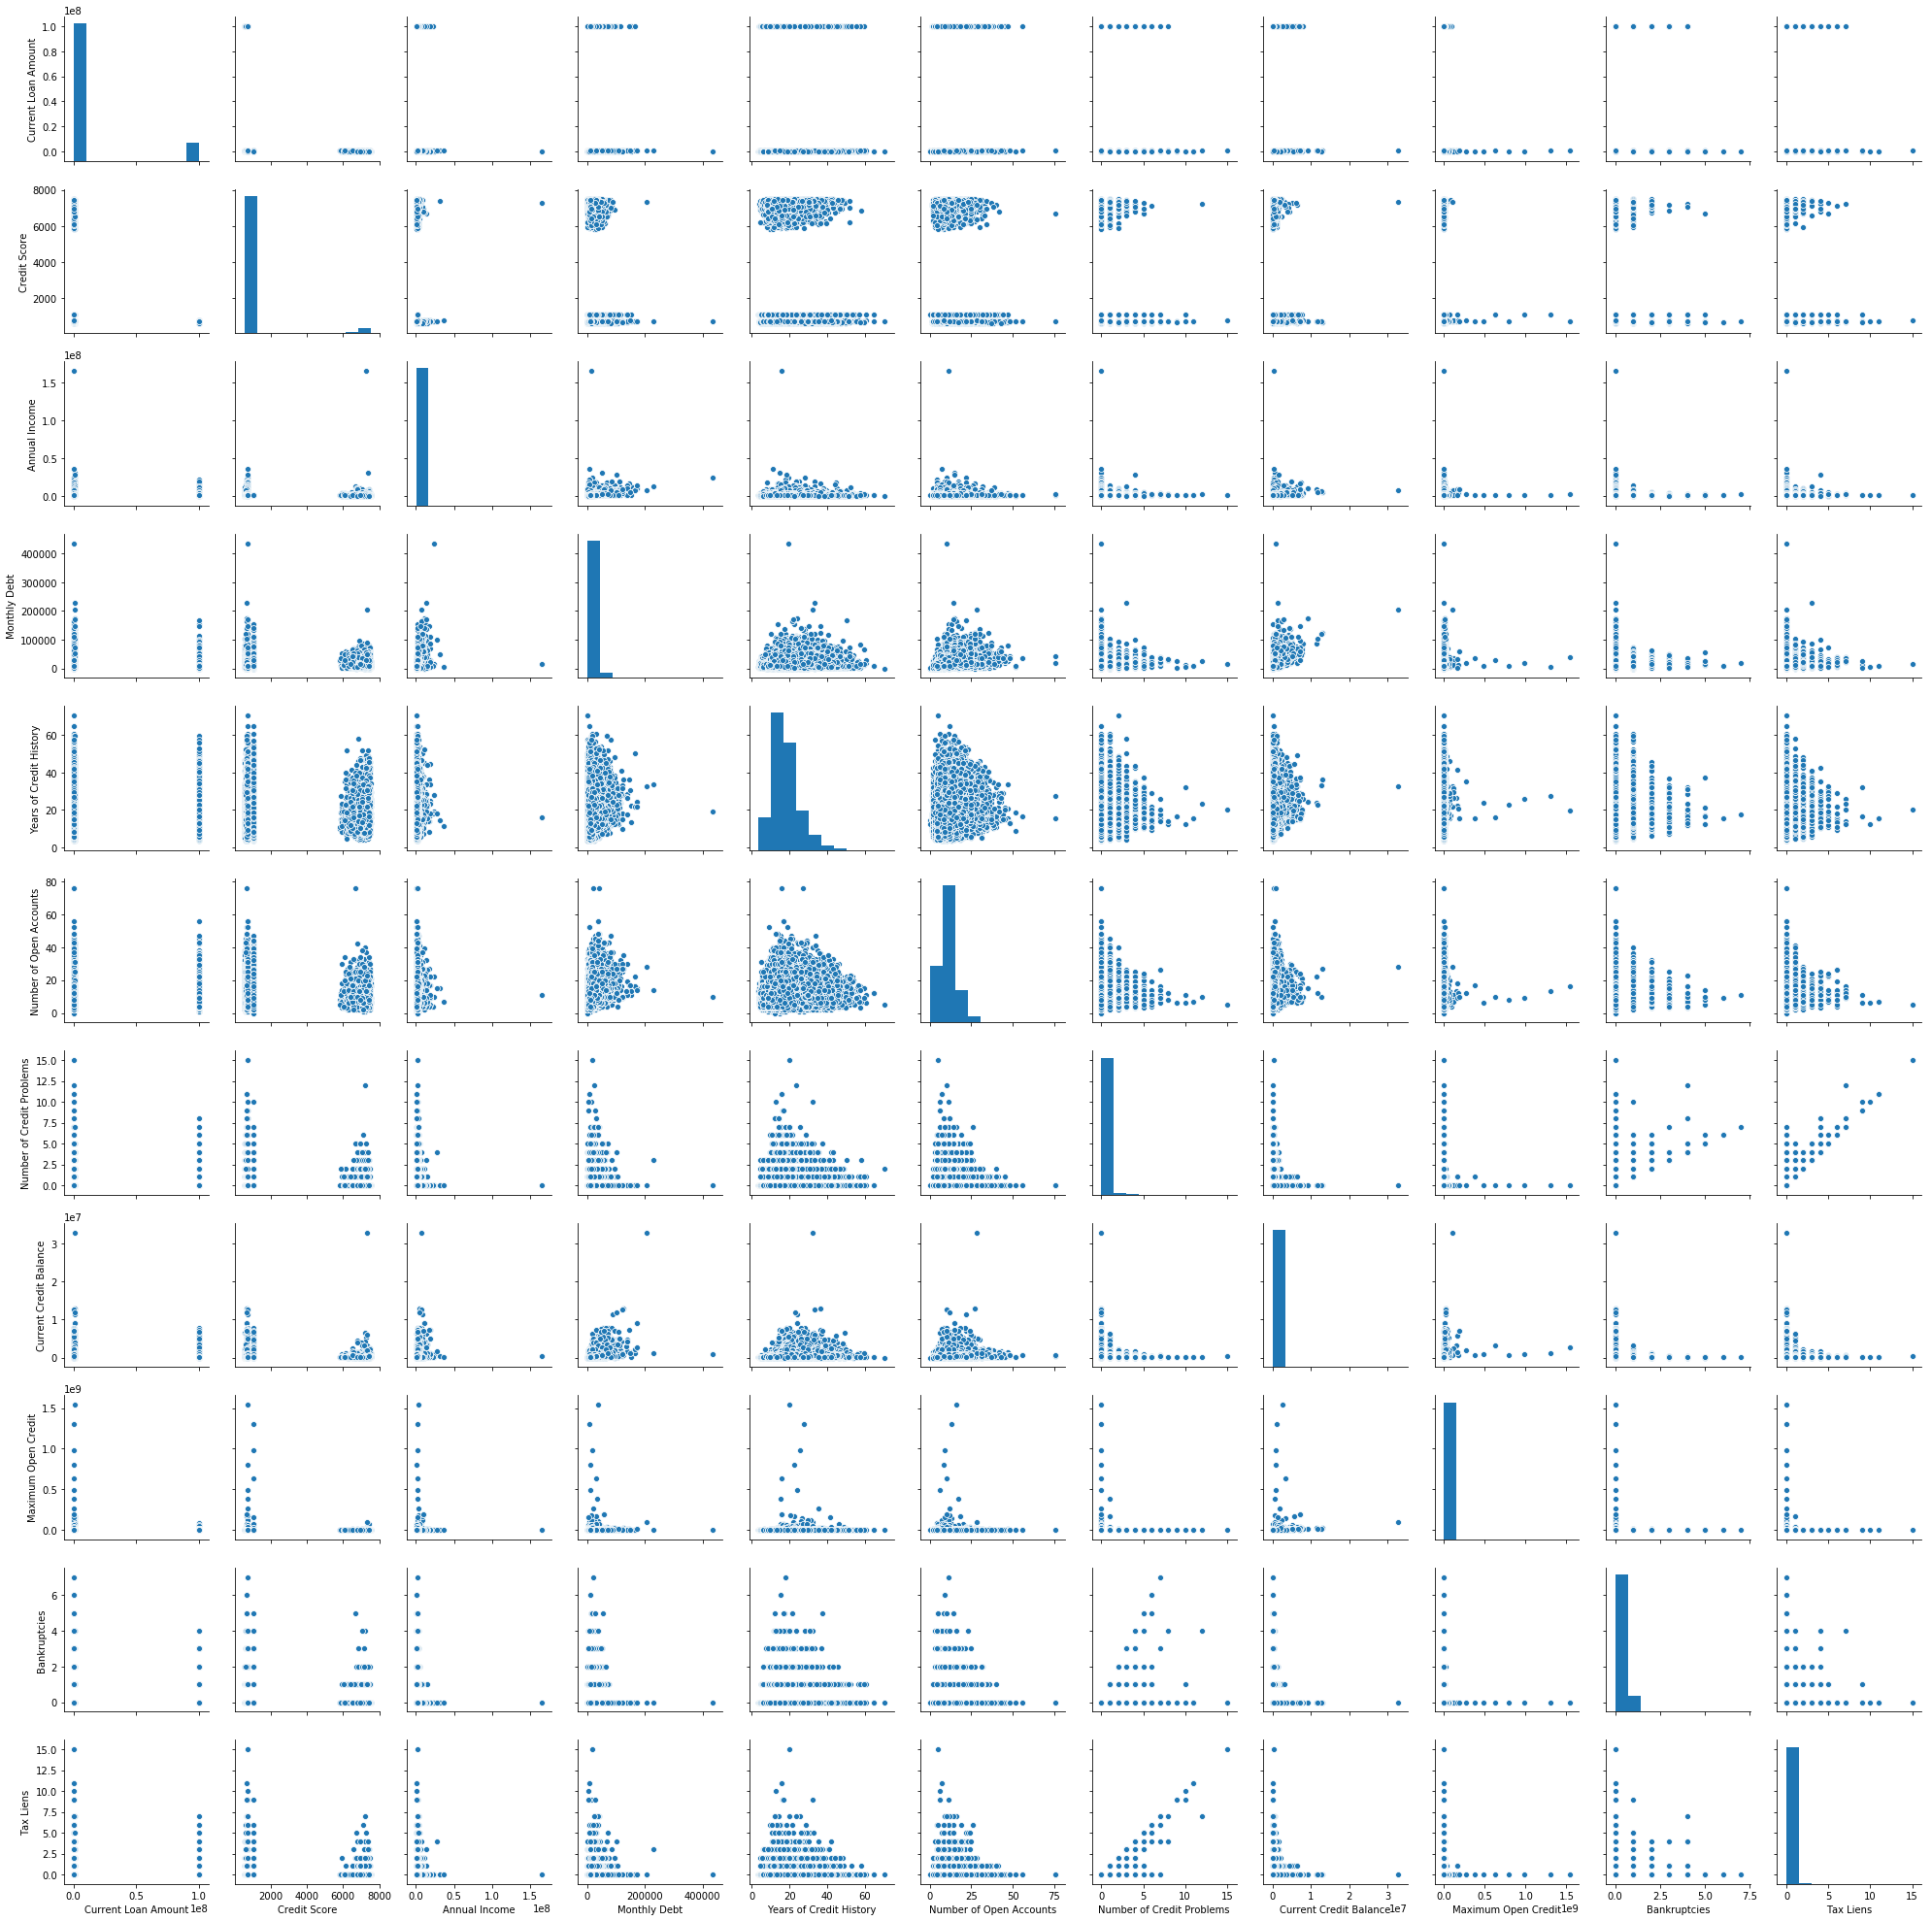

In [25]:
sns.pairplot(credit)

In [26]:
# Correlations between Features and Target
correlations_data = credit.corr()['Credit Score'].sort_values(ascending=False)
print(correlations_data)

Credit Score                 1.000000
Number of Open Accounts      0.005726
Tax Liens                    0.004765
Current Credit Balance       0.000168
Monthly Debt                -0.001457
Maximum Open Credit         -0.002073
Number of Credit Problems   -0.002785
Bankruptcies                -0.006257
Years of Credit History     -0.008652
Annual Income               -0.016989
Current Loan Amount         -0.095108
Name: Credit Score, dtype: float64


In [27]:
credit.columns

Index(['Loan Status', 'Current Loan Amount', 'Term', 'Credit Score',
       'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose',
       'Monthly Debt', 'Years of Credit History', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

## Encoding categorical data & Feature Scaling


In [28]:
categorical_subset = credit[['Term', 'Years in current job', 'Home Ownership', 'Purpose']]

In [29]:
# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

Join `categorical_subset` dataframe in `credit_train`. Make sure to use `axis=1` to perform a cloumn bind. First we will drop the old categorical datas and after that we will join new one.

In [30]:
credit.drop(labels=['Term', 'Years in current job', 'Home Ownership', 'Purpose'], axis=1, inplace=True)
credit = pd.concat([credit, categorical_subset], axis = 1)

### Remove Collinear Features
Remove collinear features in a dataframe with a correlation coefficient greater than the threshold. Removing collinear features can help a model to generalize and improves the interpretability of the model.
- Inputs: Threshold: any features with correlations greater than this value are removed.
- Output: Dataframe that contains only the non-highly-collinear features

In [31]:
def remove_collinear_features(x, threshold):
    y = x['Loan Status']
    x = x.drop(columns = ['Loan Status'])
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []
    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            if val >= threshold:
                drop_cols.append(col.values[0])
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    x['Loan Status'] = y
    return x

In [32]:
# Remove the collinear features above a specified correlation coefficient
credit = remove_collinear_features(credit, 0.6);

In [33]:
credit.shape

(99794, 42)

### Split Into Training and Testing Sets

In [34]:
# Separate out the features and targets
features = credit.drop(columns='Loan Status')
targets = pd.DataFrame(credit['Loan Status'])

# Split into 80% training and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(79835, 41)
(19959, 41)
(79835, 1)
(19959, 1)


### Feature Scaling

In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [71]:
# Encoding the Dependent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_y_train = LabelEncoder()
y_train = labelencoder_y_train.fit_transform(y_train)
labelencoder_y_test = LabelEncoder()
y_test = labelencoder_y_test.fit_transform(y_test)

C:\Users\mitjp\AppData\Local\conda\conda\envs\learn-env\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mitjp\AppData\Local\conda\conda\envs\learn-env\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [72]:
y_train

array([1, 1, 0, ..., 1, 0, 1])

## Models to Evaluate
We will compare five different machine learning Classification models:
1. Logistic Regression
2. K-Nearest Neighbors Classification
3. Suport Vector Machine
4. Naive Bayes
5. Random Forest Classification

In [73]:
# Function to calculate mean absolute error
def cross_val(X_train, y_train, model):
    # Applying k-Fold Cross Validation
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
    return accuracies.mean()

In [74]:
# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_cross = cross_val(X_train, y_train, model)
    
    # Return the performance metric
    return model_cross

## Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr_cross = fit_and_evaluate(logr)

C:\Users\mitjp\AppData\Local\conda\conda\envs\learn-env\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mitjp\AppData\Local\conda\conda\envs\learn-env\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mitjp\AppData\Local\conda\conda\envs\learn-env\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mitjp\AppData\Local\conda\conda\envs\learn-env\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mitjp\AppData\Local\conda\conda\envs\learn-

In [76]:
print('Logistic Regression Performance on the test set: Cross Validation Score = %0.4f' % logr_cross)

Logistic Regression Performance on the test set: Cross Validation Score = 0.8197


## K-NN

In [77]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_cross = fit_and_evaluate(knn)

In [78]:
print('KNN Performance on the test set: Cross Validation Score = %0.4f' % knn_cross)

KNN Performance on the test set: Cross Validation Score = 0.7903


## Naive Bayes

In [79]:
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()
naive_cross = fit_and_evaluate(naive)

In [80]:
print('Naive Bayes Performance on the test set: Cross Validation Score = %0.4f' % naive_cross)

Naive Bayes Performance on the test set: Cross Validation Score = 0.4193


## Random Forest Classification

In [81]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
random_cross = fit_and_evaluate(random)

In [82]:
print('Random Forest Performance on the test set: Cross Validation Score = %0.4f' % random_cross)

Random Forest Performance on the test set: Cross Validation Score = 0.8001


## Gradiente Boosting Classification

In [83]:
from xgboost import XGBClassifier
gb = XGBClassifier()
gb_cross = fit_and_evaluate(gb)

In [84]:
print('Gradiente Boosting Classification Performance on the test set: Cross Validation Score = %0.4f' % gb_cross)

Gradiente Boosting Classification Performance on the test set: Cross Validation Score = 0.8198


Now, to better understand the results, I will show in a graph the model that has the better Cross Validation Score

Text(0.5, 1.0, 'Model Comparison on Score')

<Figure size 576x432 with 0 Axes>

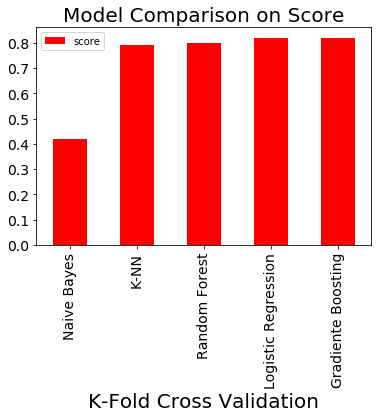

In [92]:
plt.figure(figsize=(8,6))

# DataFrame that holds the results
model_comparison = pd.DataFrame({'model': ['Logistic Regression', 'K-NN',
                                           'Naive Bayes', 'Random Forest',
                                            'Gradiente Boosting'],
                                 'score': [logr_cross, knn_cross, naive_cross, 
                                         random_cross, gb_cross]})

model_comparison.sort_values('score',ascending=True).plot(x='model',y='score',kind='bar',color='red')

#Plot Formatting
plt.yticks(size=14)
plt.xlabel('K-Fold Cross Validation',size=20)
plt.xticks(size=14,rotation=90)
plt.title('Model Comparison on Score',size = 20)

As an observation we can say that we can use Logistic Regression or Gradiente Boosting to predit the values in future. They Both have cross validation score of 81%